<a href="https://colab.research.google.com/github/RahulKr-7/Fault-Detection-Model-for-VLSI-Circuits/blob/main/ML_Model_for_Fault_Detection_in_VLSI_Circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class Counts:
 Expected_Output
 0.0       1255
 1.0       1154
-1.0        483
 10.0        30
 100.0       23
 1000.0      19
 1001.0       9
 101.0        8
 111.0        6
 11.0         5
 1010.0       5
 110.0        3
Name: count, dtype: int64
Accuracy: 0.967020805666224
Confusion Matrix:
[[379   0   0   0   0   0   0   0   0   0   0   0]
 [  0 287  71   0   0   0   0   0   0   0   0   0]
 [  0  78 314   0   0   0   0   0   0   0   0   0]
 [  0   0   0 398   0   0   0   0   0   0   0   0]
 [  0   0   0   0 372   0   0   0   0   0   0   0]
 [  0   0   0   0   0 337   0   0   0   0   0   0]
 [  0   0   0   0   0   0 404   0   0   0   0   0]
 [  0   0   0   0   0   0   0 385   0   0   0   0]
 [  0   0   0   0   0   0   0   0 384   0   0   0]
 [  0   0   0   0   0   0   0   0   0 386   0   0]
 [  0   0   0   0   0   0   0   0   0   0 355   0]
 [  0   0   0   0   0   0   0   0   0   0   0 368]]

Classification Report:
              precision    recall  f1-score   support

        -1.0 

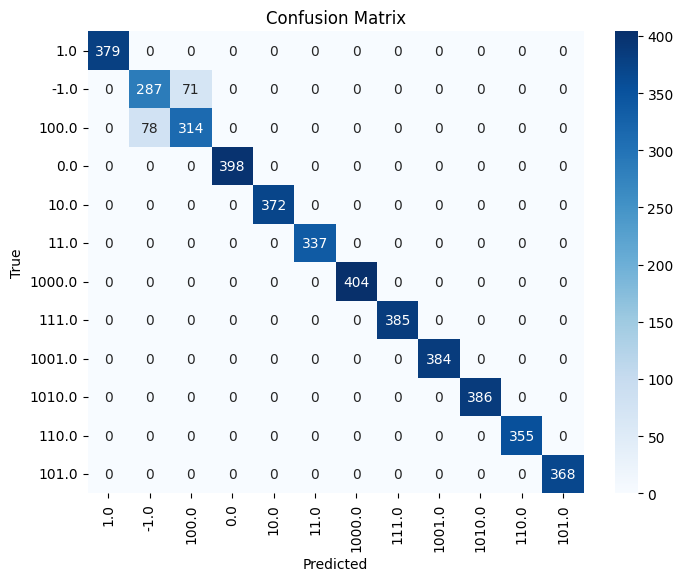

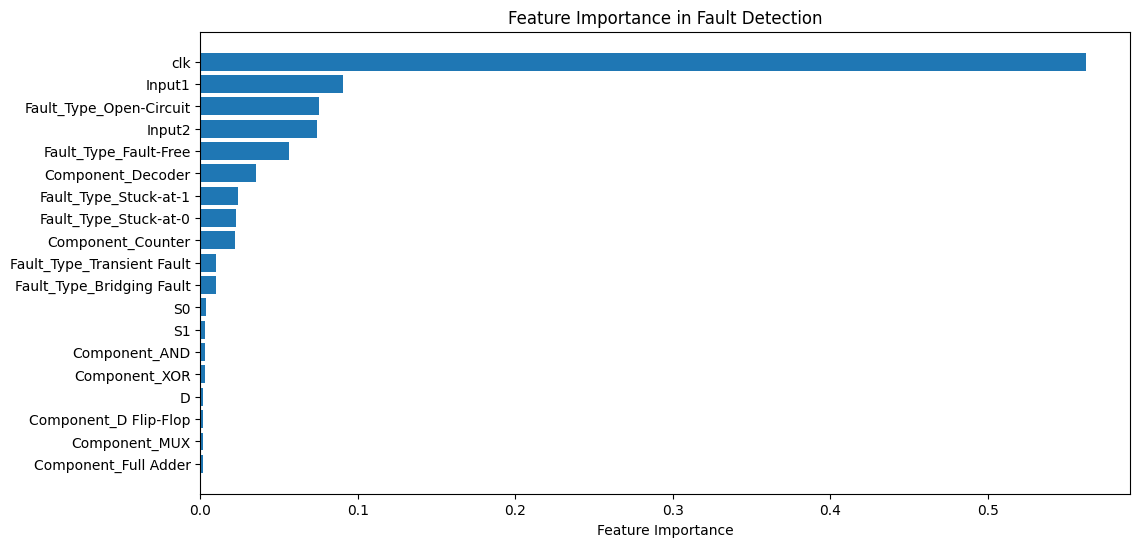

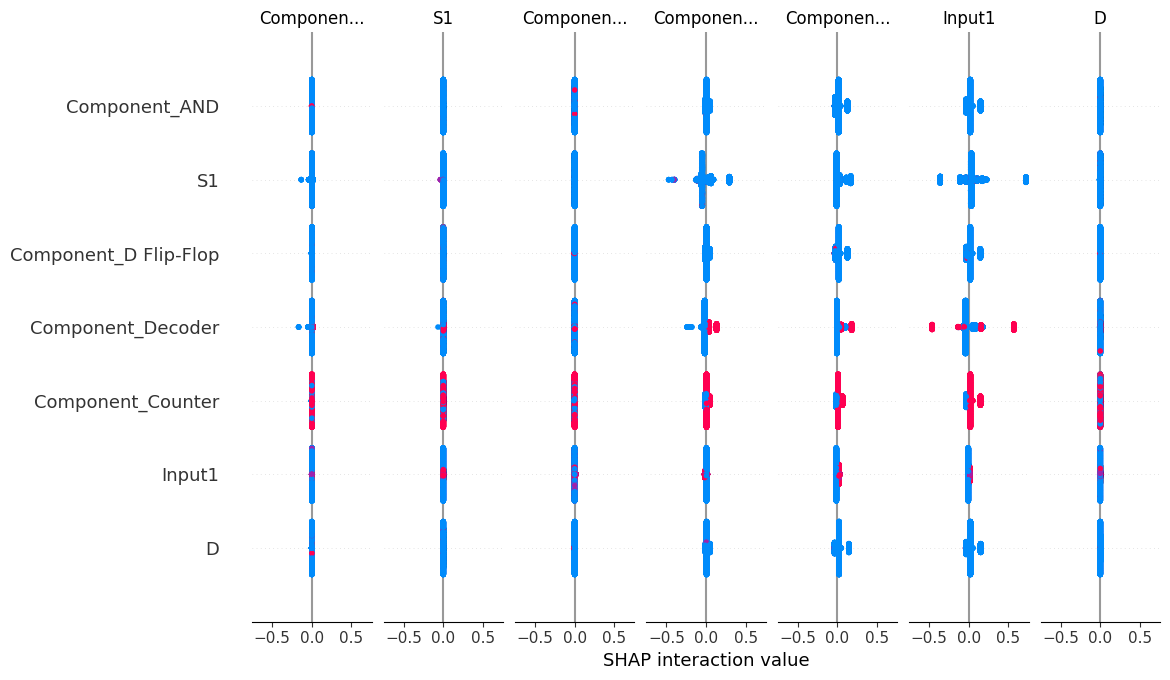

Best Parameters: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.9641431454424563
Accuracy of Best Model: 0.9674634794156707


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import shap

# Loading dataset
file_path = ('/content/Large_3000_Fault_Detection_Dataset.csv')
df = pd.read_csv(file_path)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Component', 'Fault_Type'])

# Handle missing values
# Impute missing numerical values with mean or specific placeholder (e.g., -1)
df_encoded.fillna(-1, inplace=True)

# Separate features and target
X = df_encoded.drop(columns=['Expected_Output'])
y = df_encoded['Expected_Output']


# Address class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=min(5, len(y.unique()) - 1)) # Set k_neighbors to 5 or less

# Check the number of samples in each class
class_counts = y.value_counts()
print("Class Counts:\n", class_counts)

# Set k_neighbors based on the minimum class count
k_neighbors_value = min(5, class_counts.min() - 1)  # Ensure k_neighbors is less than the smallest class size

# Adjust k_neighbors if it's less than 1 (to avoid errors)
k_neighbors_value = max(1, k_neighbors_value)

# Re-initialize SMOTE with the corrected k_neighbors
smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)

# Now proceed with fit_resample
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate additional metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualize feature importance
importances = model.feature_importances_
sorted_indices = importances.argsort()

plt.figure(figsize=(12, 6))
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Fault Detection')
plt.show()

# Use SHAP for explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Enhanced hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Accuracy of Best Model: {best_model_accuracy}")


Class Counts:
 Expected_Output
 0.0       1255
 1.0       1154
-1.0        483
 10.0        30
 100.0       23
 1000.0      19
 1001.0       9
 101.0        8
 111.0        6
 11.0         5
 1010.0       5
 110.0        3
Name: count, dtype: int64
Accuracy: 0.967020805666224
Confusion Matrix:
[[379   0   0   0   0   0   0   0   0   0   0   0]
 [  0 287  71   0   0   0   0   0   0   0   0   0]
 [  0  78 314   0   0   0   0   0   0   0   0   0]
 [  0   0   0 398   0   0   0   0   0   0   0   0]
 [  0   0   0   0 372   0   0   0   0   0   0   0]
 [  0   0   0   0   0 337   0   0   0   0   0   0]
 [  0   0   0   0   0   0 404   0   0   0   0   0]
 [  0   0   0   0   0   0   0 385   0   0   0   0]
 [  0   0   0   0   0   0   0   0 384   0   0   0]
 [  0   0   0   0   0   0   0   0   0 386   0   0]
 [  0   0   0   0   0   0   0   0   0   0 355   0]
 [  0   0   0   0   0   0   0   0   0   0   0 368]]

Classification Report:
              precision    recall  f1-score   support

        -1.0 

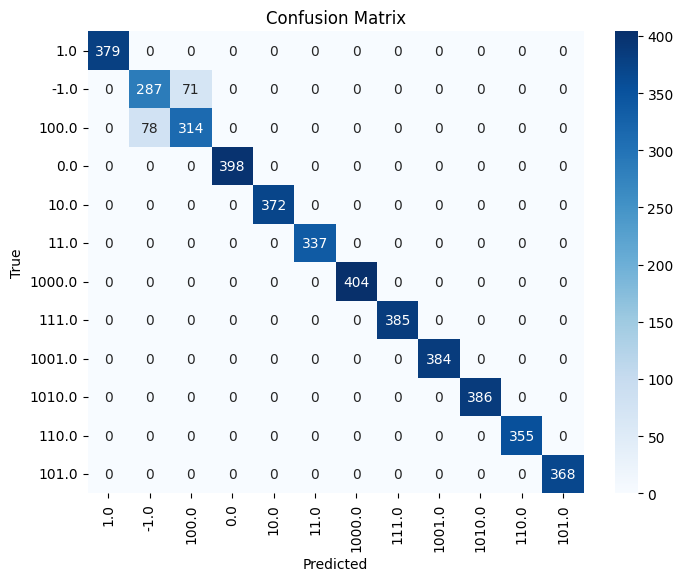

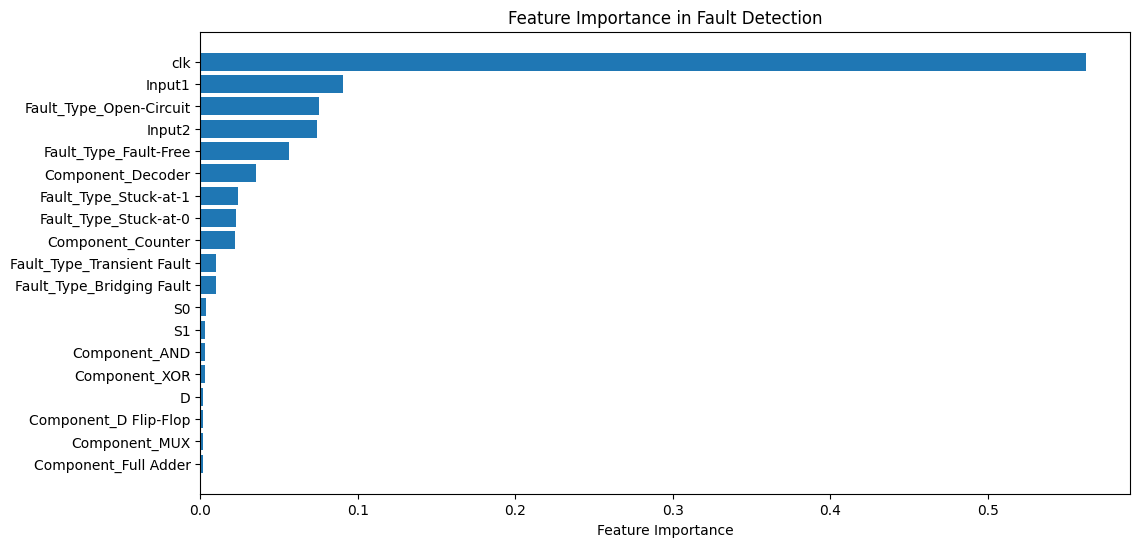

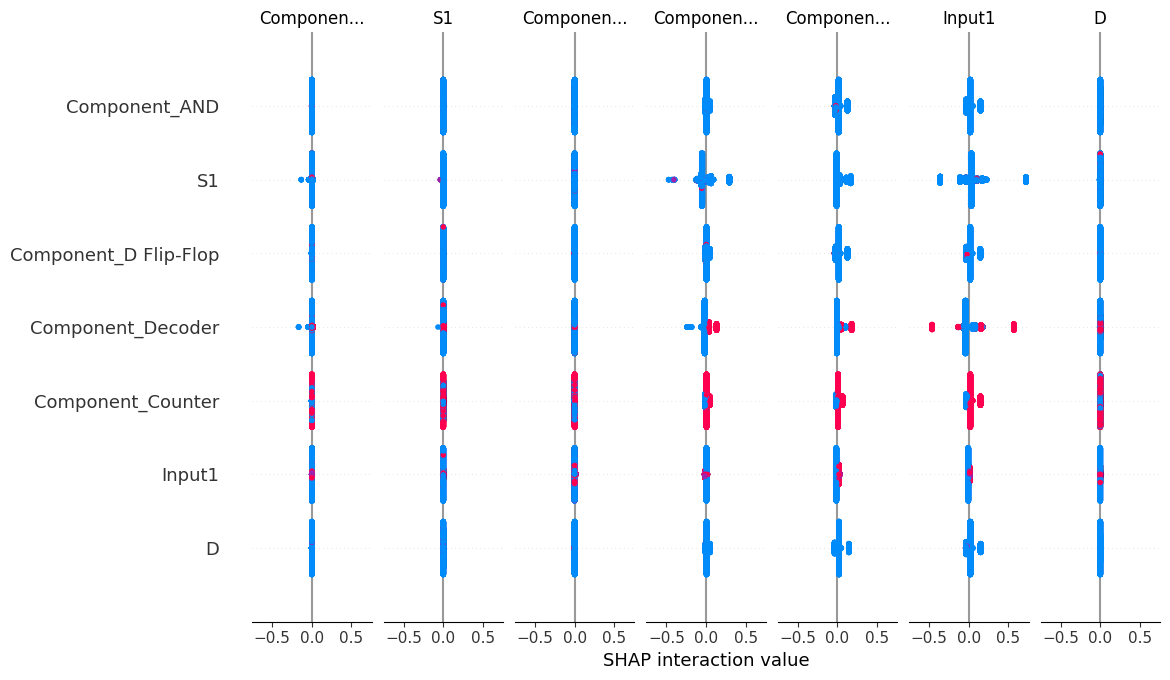


--- SVM Evaluation ---
SVM Accuracy: 0.9592740150509075
Classification Report (SVM):
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       379
         0.0       0.72      0.83      0.77       358
         1.0       0.82      0.68      0.74       392
        10.0       0.98      1.00      0.99       398
        11.0       1.00      1.00      1.00       372
       100.0       1.00      1.00      1.00       337
       101.0       1.00      1.00      1.00       404
       110.0       1.00      1.00      1.00       385
       111.0       1.00      1.00      1.00       384
      1000.0       1.00      1.00      1.00       386
      1001.0       1.00      1.00      1.00       355
      1010.0       1.00      1.00      1.00       368

    accuracy                           0.96      4518
   macro avg       0.96      0.96      0.96      4518
weighted avg       0.96      0.96      0.96      4518



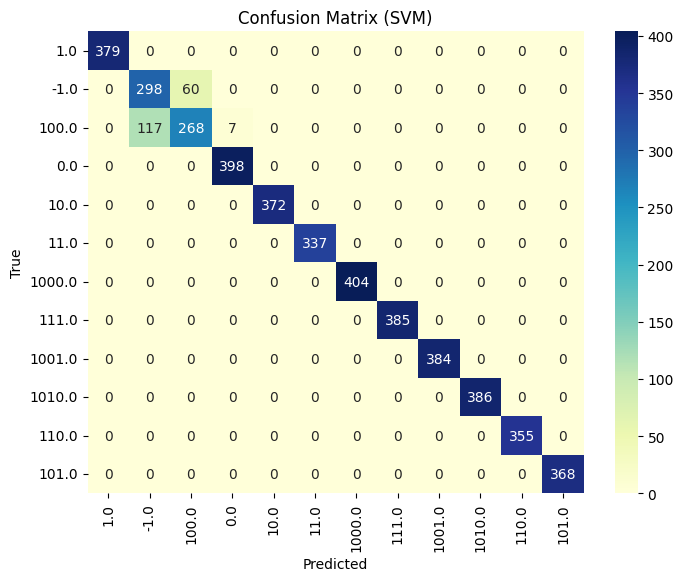


Decision Tree Evaluation ---
Decision Tree Accuracy: 0.9672421425409473
Confusion Matrix (Decision Tree):
[[379   0   0   0   0   0   0   0   0   0   0   0]
 [  0 299  59   0   0   0   0   0   0   0   0   0]
 [  0  89 303   0   0   0   0   0   0   0   0   0]
 [  0   0   0 398   0   0   0   0   0   0   0   0]
 [  0   0   0   0 372   0   0   0   0   0   0   0]
 [  0   0   0   0   0 337   0   0   0   0   0   0]
 [  0   0   0   0   0   0 404   0   0   0   0   0]
 [  0   0   0   0   0   0   0 385   0   0   0   0]
 [  0   0   0   0   0   0   0   0 384   0   0   0]
 [  0   0   0   0   0   0   0   0   0 386   0   0]
 [  0   0   0   0   0   0   0   0   0   0 355   0]
 [  0   0   0   0   0   0   0   0   0   0   0 368]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       379
         0.0       0.77      0.84      0.80       358
         1.0       0.84      0.77      0.80       392
        10.0       1.00

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import shap

# Loading dataset
file_path = ('/content/Large_3000_Fault_Detection_Dataset.csv')
df = pd.read_csv(file_path)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Component', 'Fault_Type'])

# Handle missing values
# Impute missing numerical values with mean or specific placeholder (e.g., -1)
df_encoded.fillna(-1, inplace=True)

# Separate features and target
X = df_encoded.drop(columns=['Expected_Output'])
y = df_encoded['Expected_Output']


# Address class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=min(5, len(y.unique()) - 1)) # Set k_neighbors to 5 or less

# Check the number of samples in each class
class_counts = y.value_counts()
print("Class Counts:\n", class_counts)

# Set k_neighbors based on the minimum class count
k_neighbors_value = min(5, class_counts.min() - 1)  # Ensure k_neighbors is less than the smallest class size

# Adjust k_neighbors if it's less than 1 (to avoid errors)
k_neighbors_value = max(1, k_neighbors_value)

# Re-initialize SMOTE with the corrected k_neighbors
smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)

# Now proceed with fit_resample
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate additional metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualize feature importance
importances = model.feature_importances_
sorted_indices = importances.argsort()

plt.figure(figsize=(12, 6))
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Fault Detection')
plt.show()

# Use SHAP for explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Enhanced hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_svm_pred = svm_model.predict(X_test)

# Evaluate the SVM model
print("\n--- SVM Evaluation ---")
svm_accuracy = accuracy_score(y_test, y_svm_pred)
print(f"SVM Accuracy: {svm_accuracy}")
print("Classification Report (SVM):")
print(classification_report(y_test, y_svm_pred))

# Confusion Matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, y_svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM)')
plt.show()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Decision Tree Model Evaluation
print("\nDecision Tree Evaluation ---")
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Confusion Matrix (Decision Tree):\n{conf_matrix_dt}")
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Optionally: Evaluate additional metrics
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"Decision Tree Precision: {precision_dt}")
print(f"Decision Tree Recall: {recall_dt}")
print(f"Decision Tree F1 Score: {f1_dt}")


# Output best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Accuracy of Best Model: {best_model_accuracy}")
